In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (18, 10)
df = pd.read_csv('player-0.csv')
del df['Unnamed: 0']

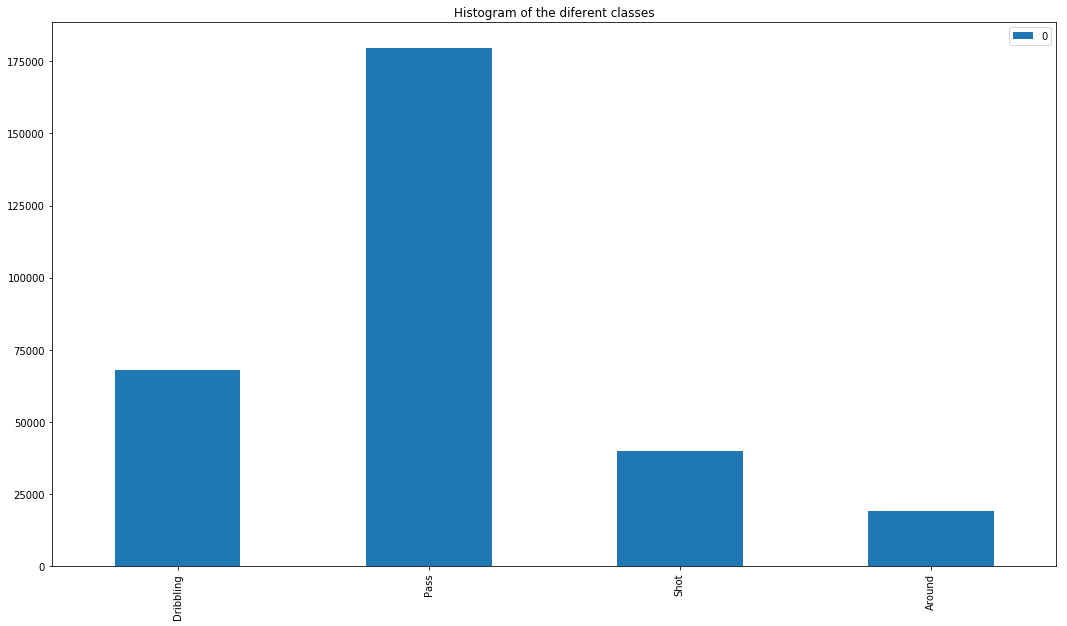

In [10]:
from collections import Counter
letter_counts = Counter(df.y.values)
dfa = pd.DataFrame.from_dict(letter_counts, orient='index')
dfa.plot(title='Histogram of the diferent classes', kind='bar')

In [ ]:
sns_plot = sns.pairplot(df.loc[:, df.columns!='segment'], hue='y')
sns_plot.savefig('pair_futbol_power.png')

KeyboardInterrupt: 

# Feature extraction

In [3]:
df.columns

Index(['Left-Accel-X [g]', 'Left-Accel-Y [g]', 'Left-Accel-Z [g]',
       'Left-Gyro-X [°/s]', 'Left-Gyro-Y [°/s]', 'Left-Gyro-Z [°/s]',
       'Right-Accel-X [g]', 'Right-Accel-Y [g]', 'Right-Accel-Z [g]',
       'Right-Gyro-X [°/s]', 'Right-Gyro-Y [°/s]', 'Right-Gyro-Z [°/s]',
       'Left-Accel-X-pow', 'Left-Accel-Y-pow', 'Left-Accel-Z-pow',
       'Left-Gyro-X-pow', 'Left-Gyro-Y-pow', 'Left-Gyro-Z-pow',
       'Right-Accel-X-pow', 'Right-Accel-Y-pow', 'Right-Accel-Z-pow',
       'Right-Gyro-X-pow', 'Right-Gyro-Y-pow', 'Right-Gyro-Z-pow', 'segment',
       'y'],
      dtype='object')

# MODEL

In [4]:
df.dropna(inplace=True)

In [5]:
X_train = df.iloc[:, :-2]
y_train = df['y'].values

In [6]:
%%time
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
X_train, y_train = smt.fit_resample(X_train, y_train)

Wall time: 55.4 s


In [15]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=30, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=30, p=2,
           weights='uniform')

In [16]:
test = pd.read_csv('player-2.csv')
del test['Unnamed: 0']
test.dropna(inplace=True)

In [17]:
X_test = test.iloc[:, :-2]
y_test = test['y']

In [ ]:
from sklearn.metrics import classification_report
y_pred_class = model.predict(X_test.values)

print(classification_report(y_test, y_pred_class))

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_class)

In [13]:
from joblib import dump, load
dump(model, 'ml_model.joblib') 

['ml_model.joblib']